 # Lecture 3: The Beta-Binomial Bayesian Model 
 
 ## Instructor: Dr. Hu Chuan-Peng  


 ## Part 1: Beta 先验

**“大选”**  

每过4年，美国人就会进行一次大选。假设这一年，Michelle决定竞选总统，而你她在明尼苏达州的竞选代理。 在整个选举期间你已经进行30次不同的民意调查。在民意调查中，Michelle的支持率最低是35%，最高是55%，而平均支持率则在45%徘徊。

### 连续变量的先验模型

**“支持率$\pi$”**

在上一节课，我们将Kasparov的胜率定义为$\pi$，$\pi$的取值被简化为0.2，0.5，0.8，且每个胜率对应一个可能性取值(如，胜率为0.8的可能性为0.65)。这是离散先验的概率模型。

在选举中，Michelle的支持率总是在变化，支持率$\pi$可以取0-1之间的任何值。过去的选举情况为支持率提供了先验信息，因此我们可以为$\pi$建立一个连续先验的概率模型(continuous prior probability),(见下图右侧)。

![Image Name](https://www.bayesrulesbook.com/bookdown_files/figure-html/prior-election-ch3-1.png)  

<center>
FIGURE 3.1: The results of 30 previous polls of Minnesotans’ support of Michelle for president (left) and a corresponding continuous prior model for π, her current election support (right).
</center>

### Beta 先验模型

**continuous probability models**

假设$\pi$是一个连续的随机变量，它服从于一个分布$f(\pi)$, 又被称为概率密度函数(probability density function, pdf)

（1）pdf有如下性质：

- $f(\pi) \ge 0$
- $\int_\pi f(\pi)d\pi = 1, f(\pi)曲线下的面积之和为1$ 
- 当$a \le b$时，$P(a < \pi < b) = \int_a^b f(\pi) d\pi$


![imageName](https://picx.zhimg.com/v2-f47722fbf5a0eebef85536394516bd29_r.jpg?source=1940ef5c)

（2）对$f(\pi)$的理解
- $f(\pi)$ 表示的是$\pi$发生的概率吗？

    -- $f(\pi)$可以大于1

    -- 概率密度越大的点，说明事件在这个点附近发生的概率越大

**为$\pi$ 选择一个合适的分布-- Beta分布**

通俗来说，我们需要知道这个分布长什么样子，在统计世界中存在着许多分布，在这里，我们假设Michelle的支持率$\pi$服从Beta分布。

$\pi$是范围[0,1]的随机变量，在Beta分布中，有两个超参数(hyperparameters)

$\alpha \; (\alpha>0)\;和 \beta\;(\beta>0)$，它们控制着分布曲线的形状

$$
\pi \sim \text{Beta}(\alpha, \beta).
$$


**Beta分布的基础介绍**

1. **概率密度函数pdf**

    Beta model的概率密度函数公式是：
    
    \begin{equation}
    f(\pi) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \pi^{\alpha-1} (1-\pi)^{\beta-1} \;\; \text{ for } \pi \in [0,1] \tag{3.1}
    \end{equation}

    <center>

    $\Gamma(z) = \int_0^\infty x^{z-1}e^{-y}dx$ 且 $\Gamma(z + 1) = z \Gamma(z)$
    
    当$z$ 是正整数的时候，$\Gamma(z)$可以被简化为$\Gamma(z) = (z-1)!$
    
    </center>

------------------------------------------

2. **控制分布形状—— $\alpha$和$\beta$**

    可视化网站：https://www.omnicalculator.com/statistics/beta-distribution#examples-of-beta-distribution-graphs

    调整$\alpha$和$\beta$的大小，观察分布形状的变化

    下图展示了不同$\alpha$和$\beta$下的概率密度函数，实线代表均值，虚线代表众数
    
    ![imageName](https://www.bayesrulesbook.com/bookdown_files/figure-html/beta-tuning-1.png)

    - 当$\alpha = \beta = 1$时，服从标准均匀分布(the standard Uniform)
    - 当$\alpha > \beta$时，分布会向右移动，均值 > 0.5
    - 当$\alpha < \beta$时，分布会向左移动，均值 < 0.5
    - 当$\alpha = \beta$时，分布是左右对称的，均值 = 0.5



**Beta分布的集中趋势量数**

![imageName](https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Visualisation_mode_median_mean.svg/800px-Visualisation_mode_median_mean.svg.png)

**1. 平均数(mean)**

- $\pi$的平均取值
$$
E(\pi)  = \frac{\alpha}{\alpha + \beta} 
$$
$$
E(\pi) = \int \pi \cdot f(\pi)d\pi.
$$

**2. 众数(mode)**

- $\pi$最可能的取值。即，在$\pi$下，$f(\pi)$能取到最大值。

$$
\text{Mode}(\pi)  = \frac{\alpha - 1}{\alpha + \beta - 2} \;\;\; \text{ when } \; \alpha, \beta > 1. 
$$
$$
\text{Mode}(\pi) = \text{argmax}_\pi f(\pi).
$$
**3. 方差(variance)**

- $\pi$取值的可变性(variability)
$$
\text{Var}(\pi) = E((\pi - E(\pi))^2) = \int (\pi - E(\pi))^2 \cdot f(\pi) d\pi.
$$

\begin{equation}
\text{Var}(\pi) = \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)} .
\end{equation}

**4. 标准差(standard deviation)**
\begin{equation}
\text{SD}(\pi) := \sqrt{\text{Var}(\pi)} .
\end{equation}

**调整Beta先验**

我们已经知道，Michelle的平均支持率为45%。我们可以根据这一点来计算beta分布的$\alpha$和$\beta$。
$$
E(\pi) = \alpha/(\alpha + \beta) \approx 0.45
$$
重新整理过后：
$$
\alpha \approx \frac{9}{11} \beta
$$
一个合适的分布中，$\alpha$和$\beta$需要满足的条件如上，我们可以选择 *Beta(9,11), Beta(27,33), Beta(45,55)*

Text(0.5, 1.0, 'beta(45,55)')

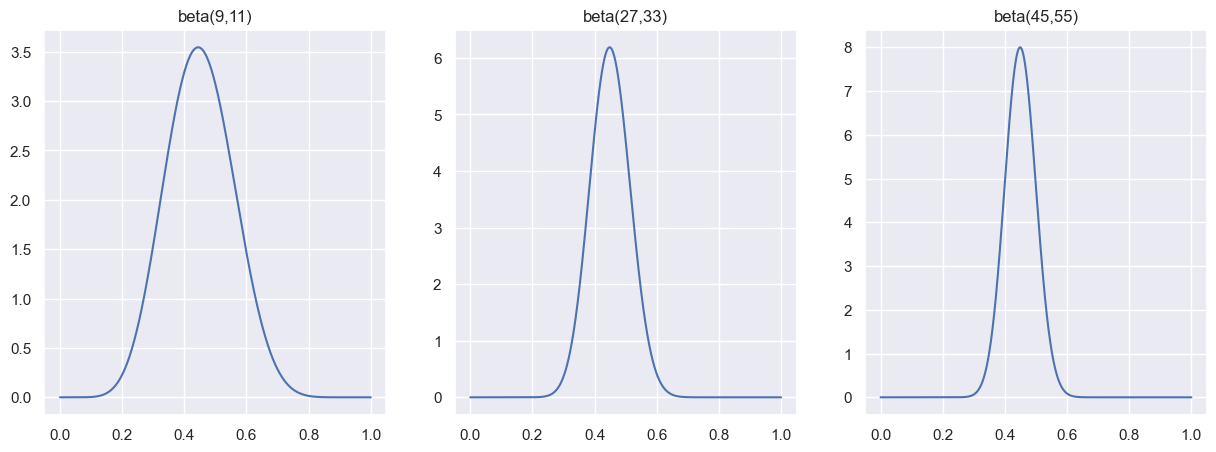

In [42]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

x = np.linspace(0,1,10000)
y1 = beta.pdf(x,9,11)
y2 = beta.pdf(x,27,33)
y3 = beta.pdf(x,45,55)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot(x,y1)
axes[0].set_title("beta(9,11)")
axes[1].plot(x,y2)
axes[1].set_title("beta(27,33)")
axes[2].plot(x,y3)
axes[2].set_title("beta(45,55)")

我们选择$\pi \sim \text{Beta}(45,55)$作为合理的先验模型 

带入公式，可以计算出$先验f(\pi)$的pdf、平均数、众数、方差和标准差：

- pdf:
$$
f(\pi) = \frac{\Gamma(100)}{\Gamma(45)\Gamma(55)}\pi^{44}(1-\pi)^{54} \;\; \text{ for } \pi \in [0,1]  .
$$

- 平均数:
$$
E(\pi) = \frac{45}{45 + 55} = 0.4500 
$$

- 众数:
$$
\text{Mode}(\pi) = \frac{45 - 1}{45 + 55 - 2} = 0.4490
$$

- 方差:
$$
\text{Var}(\pi)  = \frac{45 \cdot 55}{(45 + 55)^2(45 + 55 + 1)} = 0.0025 
$$

- 标准差：
$$
\text{SD}(\pi)   = \sqrt{0.0025} = 0.05.
$$





## Part 2 Binomial 与似然 

### 二项数据模型&似然函数


确定先验之后，第二步，我们需要开始收集数据，构建似然函数

假设我们在明尼苏达州发起了一场$n = 50$人的投票，其中支持Michelle的人数为$Y$，我们大概知道，如果支持率$\pi$越大，支持数$Y$也会更多。我们对选举结果做出如下假设：

1. 每个投票者的结果都是互不影响的

2. 任何一个人支持Michelle的可能性都为$\pi$


我们已经知道，在这两个前提下，支持数$Y$与支持率$\pi$之间的关系符合二项分布：
$$
Y | \pi \sim \text{Bin}(50, \pi)
$$

在不同的支持率下，出现特定支持数的可能性$f(y|\pi)\quad y \in \{0,1,2,...,50\}$ 可以表示为：
$$
f(y|\pi) = P(Y=y | \pi) = \binom{50}{y} \pi^y (1-\pi)^{50-y} 
$$

在不同支持率下，支持数为30的似然函数可以写成：
$$
L(\pi | y=30) = \binom{50}{30} \pi^{30} (1-\pi)^{20} \; \; \text{ for } \pi \in [0,1] 
$$

如，当$\pi = 0.5$时，投票数为30的概率为：

$$
L(\pi = 0.5 | y = 30) = \binom{50}{20} 0.5^{30} 0.5^{20} \approx 0.042 
$$

--------------------------


下图展示了不同支持率下的投票数情况分布：

![image](https://www.bayesrulesbook.com/bookdown_files/figure-html/binoms-3-1.png)


支持率高时，投票数高的情况更可能出现；支持率低时，更可能出现的是投票数低的情况，这很符合我们的直觉。

黑点表示投票数为$Y=30$发生的相对可能性，将不同支持率$\pi \in (0~1)$下，$Y=30$发生的相对可能性组合在一起，就构成了一个似然函数。

$$
L(\pi | y=30) = \binom{50}{30} \pi^{30} (1-\pi)^{20} \; \;  for \; \pi \in [0,1]  .
$$

<center>

![image](https://www.bayesrulesbook.com/bookdown_files/figure-html/likelihood-election-ch3-1.png)

</center>

从两幅图中，我们都可以发现，当$\pi=0.6$时，$L(\pi|y=30)$ 取到最大值。也就是说投票数为30这个情况最可能在当$\pi = 0.6$时出现


### Beta 后验模型

我们有了先验与似然两种信息：

\begin{split}
Y | \pi & \sim \text{Bin}(50, \pi)  \\
    \pi & \sim \text{Beta}(45, 55). \\
\end{split}

<center>

![imageName](https://www.bayesrulesbook.com/bookdown_files/figure-html/like-election-ch3-1.png)

</center>

* 注意，在这里，为了方便在视觉上对比先验和似然，似然函数被缩放为相加和为1

**思考**

哪一张图正确反映了$\pi$的后验模型？


![imageName](https://www.bayesrulesbook.com/bookdown_files/figure-html/unnamed-chunk-105-1.png)

我们可以画出后验分布图：

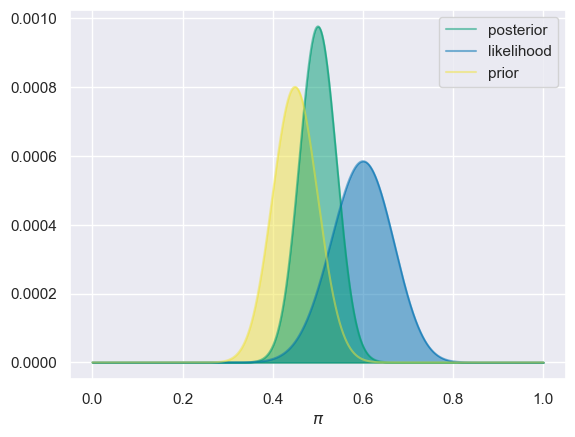

In [44]:
import scipy.stats as st 
x = np.linspace(0,1,10000)
a,b = 45,55
prior = beta.pdf(x,a,b)/np.sum(beta.pdf(x,a,b))

k = 30
n = 50
likelihood = st.binom.pmf(k,n,x)

unnorm_posterior = prior * likelihood
posterior = unnorm_posterior/np.sum(unnorm_posterior)
likelihood = likelihood /np.sum(likelihood)

plt.plot(x,posterior, color="#009e74", alpha=0.5, label="posterior")
plt.plot(x,likelihood, color="#0071b2", alpha=0.5, label="likelihood")
plt.plot(x,prior, color="#f0e442", alpha=0.5, label="prior")
plt.legend()
plt.xlabel('$\pi$')
plt.fill_between(x, prior, color="#f0e442", alpha=0.5)
plt.fill_between(x, likelihood, color="#0071b2", alpha=0.5)
plt.fill_between(x, posterior, color="#009e74", alpha=0.5)

**正式计算**

$$
f(\pi | y = 30) = \frac{f(\pi)L(\pi|y = 30)}{f(y = 30)}.
$$

和之前一样，分母$f(y = 30)$是一个常数，在计算中可以将其忽略

\begin{split}
f(\pi | y = 30)
& \propto f(\pi) L(\pi | y=30)  \\
& = \frac{\Gamma(100)}{\Gamma(45)\Gamma(55)}\pi^{44}(1-\pi)^{54} \cdot \left(\!\!\begin{array}{c} 50 \\ 30 \end{array}\!\!\right) \pi^{30} (1-\pi)^{20}  \\
& = \left[\frac{\Gamma(100)}{\Gamma(45)\Gamma(55)}\left(\!\!\begin{array}{c} 50 \\ 30 \end{array}\!\!\right) \right] \cdot \pi^{74} (1-\pi)^{74}  \\
\\
& \propto \pi^{74} (1-\pi)^{74}  . \\
\\
& [\;] 中的也是可以忽略的常数项 \\
\end{split}

整理一下可知，后验分布可以表示为：
$$
f(\pi | y=30) = c \pi^{74} (1-\pi)^{74} \propto \pi^{74} (1-\pi)^{74}
$$

根据这个公式，我们发现 $f(\pi | y=30)$ 和 $Beta(75,75)$ 有着相似的形状

$$
Beta(75,75) = \frac{\Gamma(150)}{\Gamma(75)\Gamma(75)}\pi^{74} (1-\pi)^{74} 
$$

实际上，在这里后验分布也确实是Beta分布：

$$
\pi | (Y = 30) \sim \text{Beta}(75,75)
$$

**对后验模型进行总结**

在结合先验和似然之后，我们对支持率$\pi$的认识发生了更新。

和先验模型一样，后验模型仍然是一个$Beta$分布。

$$
\pi | (Y = 30) \sim \text{Beta}(75,75)
$$


$$
f(\pi | y = 30) = \frac{\Gamma(150)}{\Gamma(75)\Gamma(75)}\pi^{74} (1-\pi)^{74} 
$$

所以我们也可以对二者进行对比，下表进行了这一总结，可以发现，在新的数据产生之后：

例如：

对支持率的期望值从0.45增加为0.50；

模型的标准差从0.0495减少为0.0407；


<center>

|    |prior  |posterior  
|----|-----|----|
|$\alpha$   |45  |75 |
|$\beta$   |75  |75 |
|mean   |0.45  |0.50 |
|mode  |0.449  |0.500 |
|var   |0.00245  |0.001656 |
|sd   |0.04950  |0.04069 |

</center>